# The Atoms of Computation

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from math import sqrt, pi

## Splitting information into bits

In [2]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

## Your first quantum circuit

In [3]:
n = 8
n_q = n #number of qubits
n_b = n #number of output bits
qc_output = QuantumCircuit(n_q,n_b)

Adds a `measure` operation to each of our eight qubits. Each measurement tells a specific qubit to give an output to a specific output bit. The command `qc.measure(j,j)` adds a measurement to our circuit `qc` that tells qubit `j` to write an output to bit `j`.

In [4]:
for j in range(n):
    qc_output.measure(j,j)

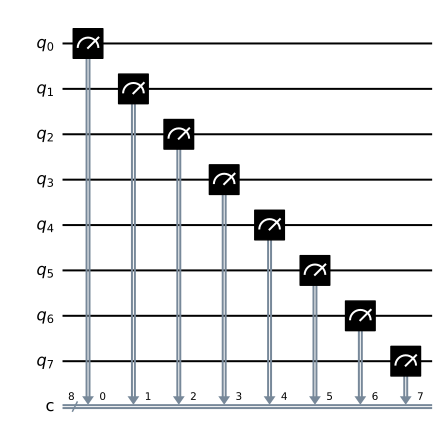

In [5]:
qc_output.draw()

Qubits are always initialized to give the output 0. Since we don't do anything to our qubits in the circuit above, this is exactly the result we'll get when we measure them. We can see this by running the circuit many times and plotting the results in a histogram. We will find that the result is always 00000000: a 0 from each qubit.

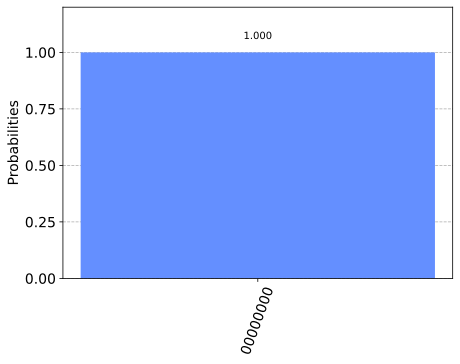

In [6]:
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Note that this result comes from a quantum simulator, which is a standard computer calculating what an ideal quantum computer would do. Simulations are only possible for small numbers of qubits (~30 qubits), but they are nevertheless a very useful tool when designing your first quantum circuits. To run on a real device you simply need to replace Aer.get_backend('qasm_simulator') with the backend object of the device you want to use.

## Example: Creating an Adder Circuit 


### 4.1 Encoding an input

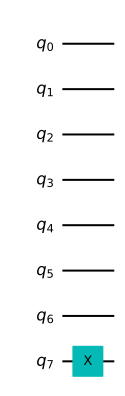

In [7]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)

qc_encode.draw()

Extracting results can be done using the circuit we have from before: qc_output. Adding the two circuits using qc_encode + qc_output creates a new circuit with everything needed to extract an output added at the end.

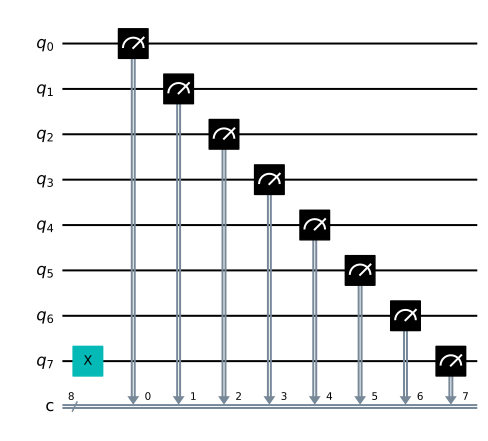

In [8]:
qc = qc_encode + qc_output
qc.draw()

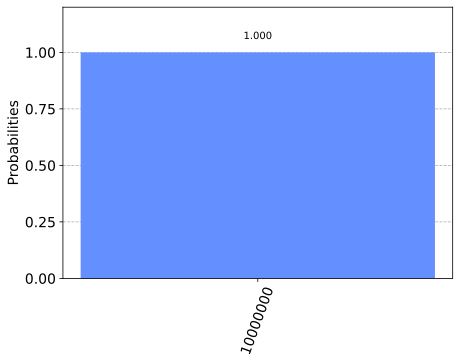

In [9]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Now our computer outputs the string `10000000` instead.

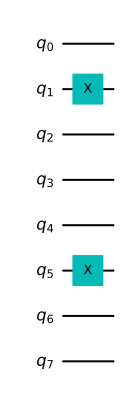

In [10]:
qc_encode = QuantumCircuit(n)
qc_encode.x(1)
qc_encode.x(5)

qc_encode.draw()

### 4.3 Adding with Qiskit

#### CNOT (XOR)
It does a NOT on the target if the control is 1, and does nothing otherwise. 

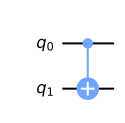

In [11]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw()

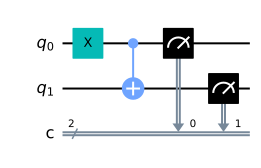

In [12]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

#### Toffoli (AND)
This will perform a NOT on the target qubit only when both controls are in state 1

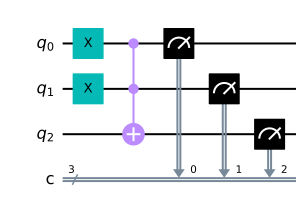

In [13]:
qc = QuantumCircuit(3,3)
qc.x(0)
qc.x(1)
qc.ccx(0,1,2)
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.draw()

#### Half adder

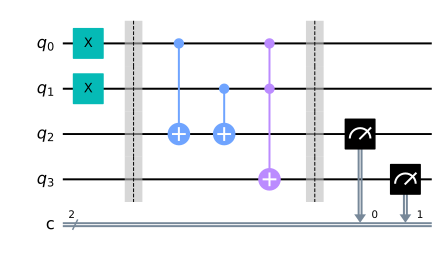

In [14]:
qc_ha = QuantumCircuit(4, 2)

# encude input in q0 and q1
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()

# use cnots to write the XOR of the inputs on q2
qc_ha.cx(0, 2)
qc_ha.cx(1, 2)

# use css to write the AND of the input on q3
qc_ha.ccx(0, 1, 3)
qc_ha.barrier()

# extract output
qc_ha.measure(2, 0)
qc_ha.measure(3, 1)

qc_ha.draw()

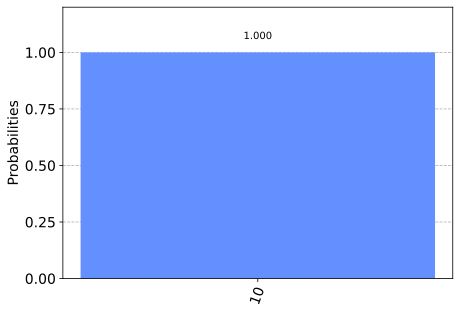

In [15]:
counts = execute(qc_ha, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

<hr/>

# Representing Qubit States

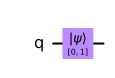

In [16]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()  # Let's view our circuit

In [17]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
result = execute(qc,backend).result() # Do the simulation, returning the result

out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.+0.j 1.+0.j]


**Note:** Python uses $j$ to represent $i$
  in complex numbers. We see a vector with two complex elements: $0.+0.j = 0$, and $1.+0.j = 1$.

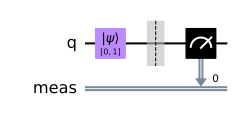

In [18]:
qc.measure_all()
qc.draw()

This time, instead of the statevector we will get the counts for the 0 and 1 results using `.get_counts()`:

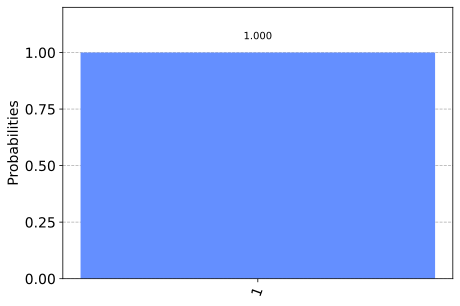

In [19]:
counts = result.get_counts()
plot_histogram(counts)

$$ |q_0 \rangle = \frac{1}{\sqrt 2} |0\rangle + \frac{i}{sqrt 2} + |1\rangle $$ 

To add a `complex` amplitude we use complex, giving the real and imaginary parts as arguments:

In [20]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>

In [21]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialise the 0th qubit in the state `initial_state`
state = execute(qc,backend).result().get_statevector() # Execute the circuit
print(state)           # Print the result


[0.70710678+0.j         0.        +0.70710678j]


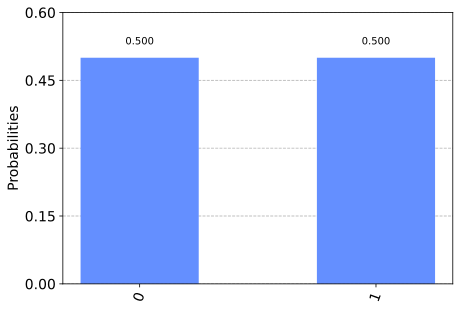

In [22]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

## The Rules of Measurement

To find the probability of measuring a state $|ψ⟩$ in the state $|x⟩$ we do:

$$p(|x⟩)=|⟨x|ψ⟩|^2$$

### Normalisation
If we want the probabilities to add up to 1 (which they should!), we need to ensure that the statevector is properly normalized. Specifically, we need the magnitude of the state vector to be 1.

$$ ⟨
ψ
|
ψ
⟩
=
1 $$
Thus if:
$$
|
ψ
⟩
=
α
|
0
⟩
+
β
|
1
⟩
$$
Then:
$$
\sqrt{
|
α
|
^2
+
|
β
|
^2}
=
1
$$

#### Quick Exercise: 
1. Create a state vector that will give a  1/3 probability of measuring |0⟩. 
    - [sqrt(1/3), sqrt(2/3)]
2. Create a different state vector that will give the same measurement probabilities.
    - [-sqrt(1/3),  sqrt(2/3)]
    - [ sqrt(1/3), -sqrt(2/3)]
    - [-sqrt(1/3), -sqrt(2/3)]
3. Verify that the probability of measuring |1⟩ for these two states is 2/3.
    - $ |ψ⟩ = \sqrt{1/3} \cdot |0⟩ + \sqrt{2/3} \cdot |1⟩  $
    - $ p(|1⟩) = |⟨1|ψ⟩|^2 \\ \;\;\;\;\;\;\;\; 
               = |\sqrt{1/3} \cdot  ⟨1|0⟩ + \sqrt{2/3} \cdot  ⟨1|1⟩|^2 \\ \;\;\;\;\;\;\;\; 
               = |\sqrt{1/3} \cdot 0 + \sqrt{2/3} \cdot 1|^2 \\ \;\;\;\;\;\;\;\; 
               = |\sqrt{2/3}|^2 \\ \;\;\;\;\;\;\;\; 
               = 2/3 $

In [23]:
from qiskit_textbook.widgets import state_vector_exercise
state_vector_exercise(target=1/3)

HTML(value='<pre></pre>')

### The Observer Effect

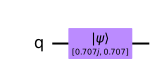

In [24]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw()

This should initialise our qubit in the state:

$$|
q
⟩
=
\dfrac{i}{√2}
|
0
⟩
+
\dfrac{1}{√2}
|
1
⟩
$$

In [25]:
state = execute(qc, backend).result().get_statevector()
print("Qubit State = " + str(state))

Qubit State = [0.        +0.70710678j 0.70710678+0.j        ]


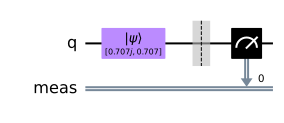

In [26]:
qc.measure_all()
qc.draw()

When we simulate this entire circuit, we can see that one of the amplitudes is always 0:

In [27]:
state = execute(qc, backend).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = [0.+0.j 1.+0.j]


## The Bloch Sphere 

We saw earlier that the general state of qubit is:
$$|q⟩=α|0⟩+β|1⟩ $$
$$ α,β ∈ \mathbb{C} $$


Rewrite the general state of a qubit:
$$ |q⟩=cos\dfrac{θ}{2}|0⟩+e^{i\phi} sin\dfrac{θ}{2}|1⟩ $$

$$ θ,\phi∈\mathbb{R} $$

Hence:
    $$ α = cos\dfrac{θ}{2}, \;\;\; β=e^{i\phi} sin\dfrac{θ}{2} $$

(Qiskit has a function to plot a bloch sphere, `plot_bloch_vector()`, but at the time of writing it only takes cartesian coordinates. We have included a function that does the conversion automatically: `plot_bloch_vector_spherical`). 

See bellow to how to convert from spherical to cartesian coordinates

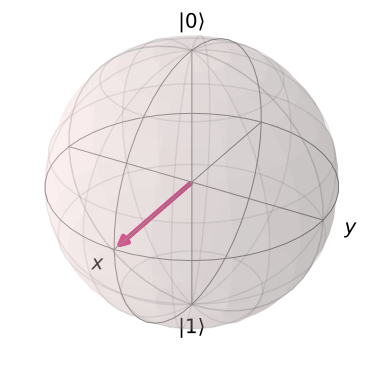

In [28]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

#### Convert Cartesian to Shperical Coordinates [ [Wiki](https://en.wikipedia.org/wiki/Spherical_coordinate_system) ]

The spherical coordinates of a point in the ISO convention (i.e. for physics: radius $r$, inclination $θ$, azimuth $φ$) can be obtained from its Cartesian coordinates ($x, y, z$) by the formulae

\begin{aligned}
    r&={\sqrt {x^{2}+y^{2}+z^{2}}},\\
    \theta &=\arccos {\frac {z}{\sqrt {x^{2}+y^{2}+z^{2}}}}=\arccos {\frac {z}{r}}=\arctan {\frac {\sqrt {x^{2}+y^{2}}}{z}},\\
    \varphi &=\operatorname {arctan} (y/x).
\end{aligned}

#### Convert Spherical to Cartesian Coordinates [ [Wiki](https://en.wikipedia.org/wiki/Spherical_coordinate_system) ]


The Cartesian coordinates may be retrieved from the spherical coordinates (radius $r$, inclination $θ$, azimuth $φ$), where $ r ∈ [0, ∞), θ ∈ [0, π], φ ∈ [0, 2π) $, by

\begin{aligned}
    x&=r\sin \theta \,\cos \varphi ,\\
    y&=r\sin \theta \,\sin \varphi ,\\
    z&=r\cos \theta .
\end{aligned}

1.5707963267948966 0
1.0 0.0 6.123233995736766e-17


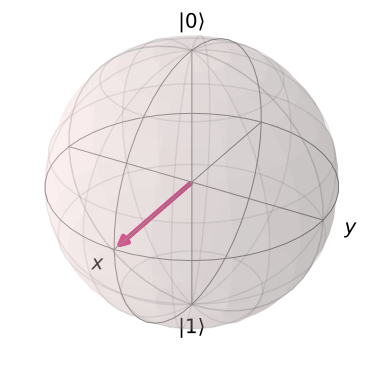

In [29]:
from qiskit_textbook.widgets import plot_bloch_vector
import numpy as np

theta = pi/2
phi = 0
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

print(theta, phi)
print(x, y, z)
    
plot_bloch_vector([x, y, z])

##### Warning! 
When first learning about qubit states, it's easy to confuse the qubits statevector with its Bloch vector. Remember the statevector is the vector disucssed in 1.1, that holds the amplitudes for the two states our qubit can be in. The Bloch vector is a visualisation tool that maps the 2D, complex statevector onto real, 3D space.



### Quick Exercise 
Use `plot_bloch_vector()` or `plot_bloch_sphere_spherical()` to plot a qubit in the states:

1. $ |0⟩ $
2. $ |1⟩ $
3. $ \dfrac{1}{√2}(|0⟩+|1⟩) $ aka  $ |+⟩ $ 
4. $ \dfrac{1}{√2}(|0⟩−i|1⟩) $ aka   $ |-⟩ $
5. $ \dfrac{1}{√2} [i, 1]^T $

Remember:
$$ |q⟩=cos\dfrac{θ}{2}|0⟩+e^{i\phi} sin\dfrac{θ}{2}|1⟩ $$
Hence:
$$ α = cos\dfrac{θ}{2}, \;\;\; β=e^{i\phi} sin\dfrac{θ}{2} $$

For solution, check summary last section lecture 1!

# Single Qubit Gates

In [30]:
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_multivector

## The Pauli Gates
### The X-Gate

$$X
=
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
=
|
0
⟩
⟨
1
|
+
|
1
⟩
⟨
0
|$$

Often called a NOT-gate.

$$X
|
0
⟩
=
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
\begin{bmatrix} 1 \\ 0 \end{bmatrix}
=
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
=
|
1
⟩$$

We can think of this as a rotation by $π$ radians around the x-axis of the Bloch sphere.

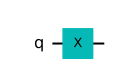

In [ ]:
# Let's do an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

Let's see the result of the above circuit. Note: Here we use plot_bloch_multivector() which takes a qubit's statevector instead of the Bloch vector.

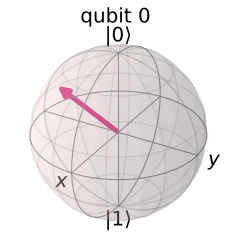

In [94]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
plot_bloch_multivector(out)

###  The Y & Z-gates 

$$ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} = −i|0⟩⟨1|+i|1⟩⟨0| $$


$$ Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} = |0⟩⟨0|-|1⟩⟨1| \;\;\;\, $$

Unsurprisingly, they also respectively perform rotations by  $π$
  around the y and z-axis of the Bloch sphere.

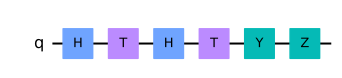

In [95]:
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw()

In [96]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

## The X, Y & Z-Bases


You may also notice that the Z-gate appears to have no effect on our qubit when it is in either of these two states. This is because the states $|0⟩$ and $|1⟩$ are the two eigenstates of the Z-gate.

The computational basis (the basis formed by the states $|0⟩$ and $|1⟩$) is often called the Z-basis

The X-basis is formed by the eigenstates of the X-gate. We call these two vectors $|+⟩$ and $|−⟩$:

The Y-basis are less commonly used basis, formed by the eigenstates of the Y-gate: $|↺⟩$, $|↻⟩$.

### Quick Exercises 
1. Verify that $|+⟩$ and $|−⟩$ are in fact eigenstates of the X-gate.
\begin{aligned}
    X|+⟩ &= \begin{bmatrix} 
                0 & 1 \\ 1 & 0 
            \end{bmatrix} 
            \begin{bmatrix} 
                \dfrac{1}{\sqrt{2}} \\ 
                \dfrac{1}{\sqrt{2}} 
            \end{bmatrix} \\
         &= \begin{bmatrix} 
                 0\cdot\dfrac{1}{\sqrt{2}} & 1\cdot\dfrac{1}{\sqrt{2}} \\ 
                 1\cdot\dfrac{1}{\sqrt{2}} & 0\cdot\dfrac{1}{\sqrt{2}} 
            \end{bmatrix} \\
         &= \begin{bmatrix} 
                 \dfrac{1}{\sqrt{2}} \\ 
                 \dfrac{1}{\sqrt{2}} 
            \end{bmatrix} 
            = 1\cdot|+⟩ \\
         \\
    X|-⟩ &= \begin{bmatrix} 
                0 & 1 \\ 1 & 0 
            \end{bmatrix} 
            \begin{bmatrix} 
                \dfrac{1}{\sqrt{2}} \\ 
                -\dfrac{1}{\sqrt{2}} 
            \end{bmatrix} \\
         &= \begin{bmatrix} 
                 0\cdot\dfrac{1}{\sqrt{2}} & 1\cdot \left( -\dfrac{1}{\sqrt{2}} \right) \\ 
                 1\cdot\dfrac{1}{\sqrt{2}} & 0\cdot \left( -\dfrac{1}{\sqrt{2}} \right)
            \end{bmatrix} \\
         &= \begin{bmatrix} 
                -\dfrac{1}{\sqrt{2}} \\ 
                \dfrac{1}{\sqrt{2}}
            \end{bmatrix} 
          = -1\cdot|-⟩
\end{aligned}

    
2. What eigenvalues do they have?
    - $ X|+⟩ = 1\cdot|+⟩ $, hence the eigenvalue $\lambda = 1$
    - $ X|-⟩ = -1\cdot|-⟩ $, hence the eigenvalue $\lambda = -1$
  

3. Why would we not see these eigenvalues appear on the Bloch sphere?
    - Because the eigenvalues are considered as a global phase and doesn't effect the mesurment.
 

4. Find the eigenstates of the Y-gate, and their co-ordinates on the Bloch sphere.
\begin{aligned}
    \det(Y) &= 0 \\
    \det\begin{bmatrix} 
           0-\lambda & i \\ 
           -i & 0-\lambda 
        \end{bmatrix} &= 0 \\
    (0-\lambda) \cdot (0-\lambda) - i \cdot (-i) &= 0 \\
    \lambda^2 + i^2 &= 0 \\
    \lambda^2 - 1 &= 0 \\
    \lambda^2 &= 1 \\
    \\
    \lambda_1 &= 1 \\
    \lambda_2 &= -1 \\
\end{aligned}

    - Now:
\begin{aligned}
    \begin{bmatrix} 
           -1 & i \\ 
           -i & -1
    \end{bmatrix} 
    \cdot
    v_1 &= 0 \\
    \begin{bmatrix} 
           -1 & i \\ 
           -i & -1
    \end{bmatrix} 
    \cdot
    \begin{bmatrix} 
           v_{1,1} \\ 
           v_{1,2}
    \end{bmatrix}  &= \begin{bmatrix} 
                          0 \\ 0
                      \end{bmatrix}\\
\end{aligned}

    - Hence:
    $$
    v_{1,1} \cdot (-1) + v_{1,2} \cdot i = 0 \\
    v_{1,1} \cdot (-i) + v_{1,2} \cdot (-1) = 0
    $$

    - By isolating $v_{1,1}, v_{1,2}$, we get:
    $$
    v_{1,1} = v_{1,2} \cdot i \\
    v_{1,2} = v_{1,1} \cdot -i \\
    $$
    
    -We know that the length should be 1:
    $$
    \sqrt{v_{1,1}^2 + v_{1,2}^2} = 1 \\
    $$
    
    - Then:
    $$
    v_{1,1} = \dfrac{1}{\sqrt2} \\
    v_{1,2} = \dfrac{i}{\sqrt2} \\
    $$

    - We do the same for $v_2$

        $$|↺⟩ =   \begin{bmatrix}  
                    \dfrac{1}{\sqrt2} \\ 
                    \dfrac{i}{\sqrt2}
                \end{bmatrix} 
                \;\;\;\;\;\;
        |↻⟩ =   \begin{bmatrix}  
                    \dfrac{1}{\sqrt2} \\ 
                    \dfrac{-i}{\sqrt2}
                \end{bmatrix} \\
        $$



## Hadamard Gate

$$H
=
\dfrac{1}{\sqrt2}
\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
=
|+⟩⟨0|+|-⟩⟨1|
$$

In [97]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

Quick Exercise 
1. Write the H-gate as the outer products of vectors $|0⟩$, $|1⟩$, $|+⟩$ and $|−⟩$.
    - $H = |+⟩⟨0|+|-⟩⟨1|$ 
    
2. Show that applying the sequence of gates: $HZH$, to any qubit state is equivalent to applying an X-gate.
    - $ HZH = 
            \dfrac{1}{\sqrt2}
            \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
            \cdot
            \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
            \cdot
            \dfrac{1}{\sqrt2}
            \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \\
        \;\;\;\;\;\;\;\;\; =
            \dfrac{1}{\sqrt2}
            \begin{bmatrix} 1 & -1 \\ 1 & 1 \end{bmatrix}
            \cdot
            \dfrac{1}{\sqrt2}
            \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \\
        \;\;\;\;\;\;\;\;\; =
            \dfrac{1}{2}
            \begin{bmatrix} 0 & 2 \\ 2 & 0 \end{bmatrix} \\
        \;\;\;\;\;\;\;\;\; =
            \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} 
            =
            X
      $
            
    
3. Find a combination of X, Z and H-gates that is equivalent to a Y-gate (ignoring global phase).
    - $ Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}
          = i \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} \\ $
          
    - $HZXH = 
            \dfrac{1}{\sqrt2}
            \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
            \cdot
            \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
            \cdot
            \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
            \cdot
            \dfrac{1}{\sqrt2}
            \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \\
        \;\;\;\;\;\;\;\;\;\;\;\; =
            \dfrac{1}{\sqrt2}
            \begin{bmatrix} 1 & -1 \\ 1 & 1 \end{bmatrix}
            \cdot
            \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
            \cdot
            \dfrac{1}{\sqrt2}
            \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \\
        \;\;\;\;\;\;\;\;\;\;\;\; =
            \dfrac{1}{\sqrt2}
            \begin{bmatrix} -1 & 1 \\ 1 & 1 \end{bmatrix}
            \cdot
            \dfrac{1}{\sqrt2}
            \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \\
        \;\;\;\;\;\;\;\;\;\;\;\; =
            \dfrac{1}{2}
            \begin{bmatrix} 0 & -2 \\ 2 & 0 \end{bmatrix} \\
        \;\;\;\;\;\;\;\;\;\;\;\; =
            \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} 
            =
            Y \; (\text{ignoring the global state } i)
      $


## Measuring in Different Bases 

We don’t always have to measure in the computational basis (the Z-basis), we can measure our qubits in any basis.


For example, we can calculate the probability of measuring either $|+⟩$ or $|−⟩$:

$$ p(|+⟩)=|⟨+|q⟩|^2,p(|−⟩)=|⟨−|q⟩|^2$$

And after measurement, we are guaranteed to have a qubit in one of these two states.

However, Qiskit only allows measuring in the Z-basis, so we must create our own using Hadamard gates:

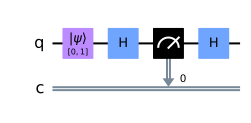

In [98]:
# Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc

initial_state = [0,1]
# Initialise our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

We have created an X-measurement by sandwiching our Z-measurement between two H-gates. (For better explination, check Qiskit 1.4)

Let’s now see the results:

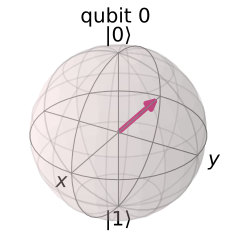

In [99]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
out_state = execute(qc,backend).result().get_statevector() # Do the simulation, returning the state vector
plot_bloch_multivector(out_state) # Display the output state vector

Note: if we run the last two code snippets, we get different results because we are measuring `initial_state = [0,1]` or $|1⟩$ state with respect to X-basis. The final state of the qubit will always be $|+⟩$ or $|−⟩$.

### Quick Exercises 
1. If we initialise our qubit in the state $|+⟩$, what is the probability of measuring it in state $|−⟩$?
    - always 0


2. Use Qiskit to display the probability of measuring a $|0⟩$ qubit in the states $|+⟩$ and $|−⟩$ (Hint: you might want to use `.get_counts()` and `plot_histogram()`).
    - see bellow.. [TBD Check with TA]

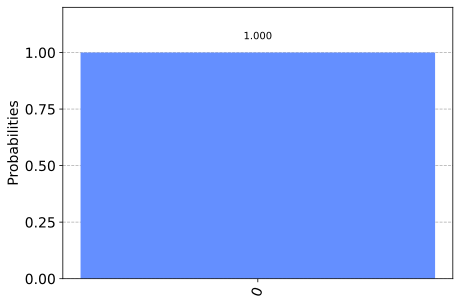

In [100]:
initial_state = [1,0]
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0

results = execute(qc,backend).result().get_counts()
plot_histogram(results)

3. Try to create a function that measures in the Y-basis.
    - probably can't make such a function using only H,X,Y,Z -gates [TBD Check with TA]

In [101]:
def y_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the Y-basis, and store the result in 'cbit'"""
    # TBD transform to Z-basis
    qc.measure(qubit, cbit) #measure in Z-basis
    # TBD back to Y-basis
    return qc

## The  $R_ϕ$-gate 
The $Rϕ$-gate performs a rotation of $ϕ$ around the Z-axis direction (and as such is sometimes also known as the Rz-gate)

$$ R_\phi = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{bmatrix} $$

Where $\phi$ is a real number.

In [102]:
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+rz')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

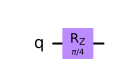

In [103]:
qc = QuantumCircuit(1)
qc.rz(pi/4, 0)
qc.draw()

You may notice that the Z-gate is a special case of the $R_ϕ$-gate, with  $ϕ=π$. In fact there are three more commonly referenced gates we will mention in this chapter, all of which are special cases of the $R_ϕ$-gate:



##  The $I$-gate (Identity gate)

This is simply a gate that does nothing

$$ I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} $$

There are two main reasons behind this, one is that it is often used in calculations, for example: proving the X-gate is its own inverse:

$$ I = XX $$

The second, is that it is often useful when considering real hardware to specify a ‘do-nothing’ or ‘none’ operation.


### Quick Exercise 
What are the eigenstates of the $I$-gate?
- all states [TBD Check with the TA]

## The S-gates

this is an $R_ϕ$-gate with $ϕ=π/2$. It does a quarter-turn around the Bloch sphere. It is important to note that unlike every gate introduced in this chapter so far, **the S-gate is not its own inverse!**

As a result, you will often see the $S^†$-gate, (also “S-dagger”, “Sdg” or $√Z^†$-gate). The $S^†$-gate is clearly an $R_ϕ$-gate with $ϕ=−π/2$:

$$ S = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/2} \end{bmatrix}, \;\;
   S^† = \begin{bmatrix} 1 & 0 \\ 0 & e^{-i\pi/2} \end{bmatrix}
$$

The name " $√Z$-gate" is due to the fact that two successively applied S-gates has the same effect as one Z-gate:

$$ SS|q⟩=Z|q⟩ $$

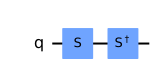

In [104]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw()

## The T-gate 
The T-gate is a very commonly used gate, it is an $R_ϕ$-gate with $ϕ=π/4$:

$$ T = \begin{bmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{bmatrix}, \;\;
   T^† = \begin{bmatrix} 1 & 0 \\ 0 & e^{-i\pi/4} \end{bmatrix}
$$

also known as the $\sqrt[4]Z$-gate.

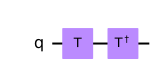

In [105]:
qc = QuantumCircuit(1)
qc.t(0)   # Apply T-gate to qubit 0
qc.tdg(0) # Apply Tdg-gate to qubit 0
qc.draw()

In [106]:
from qiskit_textbook.widgets import gate_demo
gate_demo()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

## General U-gates

the $U_3$-gate is the most general of all single-qubit quantum gates. Every gate in this chapter could be specified as $U_3(θ,\phi,λ)$:

$$ U_3(θ,\phi,λ) = \begin{bmatrix} 
                        cos(θ/2) & -e^{iλ}sin(θ/2) \\ 
                        e^{i\phi}sin(θ/2) & e^{iλ+i\phi} cos(θ/2)
                    \end{bmatrix}
$$

Qiskit provides $U_2$ and $U_1$-gates, which are specific cases of the $U_3$ gate in which $θ =π/2$, and $θ=\phi=0$ respectively. All single-qubit operations are compiled down to $U_1$, $U_2$ and  $U_3$. For this reason they are sometimes called the **physical gates**

$$ U_3(\pi/2,\phi,λ) = U_2 = \dfrac{1}{\sqrt 2}
                            \begin{bmatrix} 
                                1 & -e^{iλ} \\ 
                                e^{i\phi} & e^{iλ+i\phi}
                            \end{bmatrix}
   \;\;\;\;\;\;
   U_3(0,0,λ) = U_1 = \begin{bmatrix} 
                            1 & 0 \\ 
                            0 & e^{iλ}
                        \end{bmatrix}
$$

# Multiple Qubits and Entangled States

## Representing Multi-Qubit States

If we have $n$ qubits, we will need to keep track of $2_n$ complex amplitudes. This is the reason quantum computers with large numbers of qubits are so difficult to simulate.

In [107]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

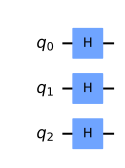

In [108]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw()

Each qubit is in the state $|+⟩$, so we should see the vector:
$|+++⟩=
1√8 
\begin{bmatrix} 
    1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1
\end{bmatrix}
$

In [109]:
# Let's see the result
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

### Quick Exercises
Write the state: $|ψ⟩=1\sqrt2\;|00⟩+i\sqrt2\;|01⟩$ as two separate qubits.


##  Single Qubit Gates on Multi-Qubit Statevectors



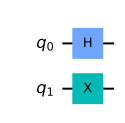

In [110]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

We can represent the simultaneous operations (H & X) using their tensor product:


$$ X|q_1⟩⊗H|q_0⟩=(X⊗H)|q_1q_0⟩$$

In [111]:
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(unitary, pretext="\\text{Circuit = } (X ⊗ H) = \n")

<IPython.core.display.Math object>

If we want to apply a gate to only one qubit at a time (such as in the circuit below), we describe this using tensor product with the identity matrix, eg:


$$ X⊗I $$

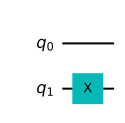

In [112]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw()

In [113]:
# Simulate the unitary
usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, pretext="\\text{Circuit = } X⊗I = ")

<IPython.core.display.Math object>

## Multi-Qubit Gates

### The CNOT-Gate 

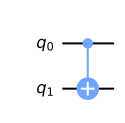

In [114]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)
# See the circuit:
qc.draw()

## Phase Kickback

### Exploring the CNOT-Gate 

In [115]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print() instead.
from qiskit_textbook.tools import array_to_latex

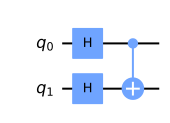

In [116]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw()

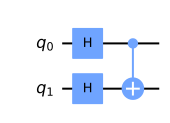

<IPython.core.display.Math object>

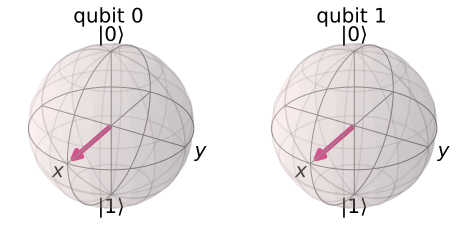

In [117]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
display(qc.draw())  # `display` is a command for Jupyter notebooks
                    # similar to `print`, but for rich content

# Let's see the result
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

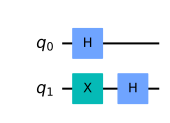

In [118]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.draw()

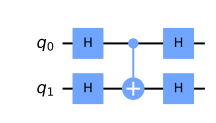

<IPython.core.display.Math object>

In [119]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw()) 

usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

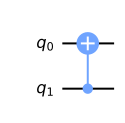

<IPython.core.display.Math object>

In [120]:
qc = QuantumCircuit(2)
qc.cx(1,0)
display(qc.draw())

qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

###  Phase Kickback

#### Quick Exercises:

1. What would be the resulting state of the control qubit (q0) if the target qubit (q1) was in the state |0⟩?
    - Nothing

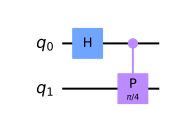

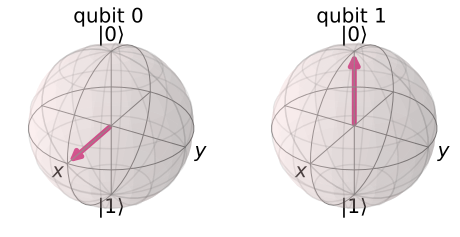

In [121]:
qc = QuantumCircuit(2)
qc.h(0)
# Add Controlled-T
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

2. What would happen to the control qubit (q0) if the if the target qubit (q1) was in the state $|1⟩$, and the circuit used a controlled-Sdg gate instead of the controlled-T?
    - It will rotate pi/2 around Z-axis clock wise

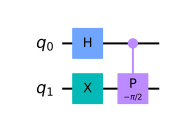

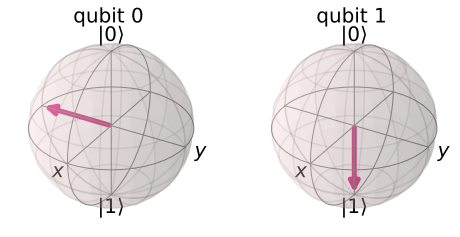

In [122]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-T
qc.cp(-pi/2, 0, 1)
display(qc.draw())
# See Results:
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

3. What would happen to the control qubit (q0) if it was in the state $|1⟩$ instead of the state $|+⟩$ before application of the controlled-T?
    - rotate arount itself, nothing to be observed (Change global phase? [TBD])

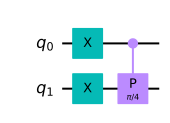

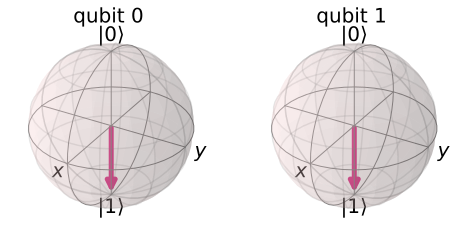

In [123]:
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
# Add Controlled-T
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(final_state)

## More Circuit Identities

In [124]:
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
from math import pi
qc = QuantumCircuit(2)
c = 0
t = 1

### Making a Controlled-Z from a CNOT

Just as the *CNOT* applies an $X$ to its target qubit whenever its control is in state $|1⟩$, the controlled-$Z$ applies a $Z$ in the same case.

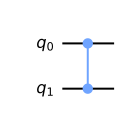

In [125]:
# a controlled-Z
qc.cz(c,t)
qc.draw()

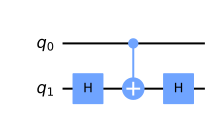

In [126]:
qc = QuantumCircuit(2)
# also a controlled-Z
qc.h(t)
qc.cx(c,t)
qc.h(t)
qc.draw()

### Controlled-Y
More generally, we can transform a single *CNOT* into a controlled version of any rotation around the Bloch sphere by an angle $π$, by simply preceding and following it with the correct rotations. For example, a controlled-$Y$:
> *Remember: S-gate rotate the state $\pi/4$ arount Z-axis, where Sdg-gate rotate $-\pi/4$*

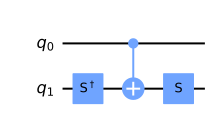

In [127]:
qc = QuantumCircuit(2)
# a controlled-Y
qc.sdg(t)
qc.cx(c,t)
qc.s(t)
qc.draw()

### Controlled-H

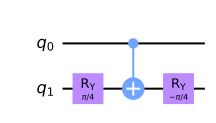

In [128]:
qc = QuantumCircuit(2)
# a controlled-H
qc.ry(pi/4,t)
qc.cx(c,t)
qc.ry(-pi/4,t)
qc.draw()

## Swapping Qubits
Move the state between two qubits.

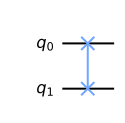

In [129]:
a = 0
b = 1
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.swap(a,b)
qc.draw()

How we might make it using our standard gate set?


First, we'll look at the case that qubit a is in state $|1⟩$ and qubit b is in state $|0⟩$. For this we'll apply the following gates:

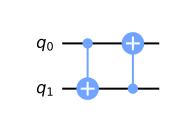

In [130]:
qc = QuantumCircuit(2)
# swap a 1 from a to b
qc.cx(a,b) # copies 1 from a to b
qc.cx(b,a) # uses the 1 on b to rotate the state of a to 0
qc.draw()

Now let's take this state and SWAP back to the original one.

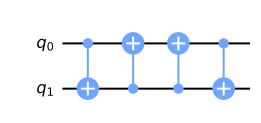

In [131]:
# swap a q from b to a
qc.cx(b,a) # copies 1 from b to a
qc.cx(a,b) # uses the 1 on a to rotate the state of b to 0
qc.draw()

> Note that in these two processes, the first gate of one would have no effect on the initial state of the other. For example, when we swap the $|1⟩$ b to a, the first gate is `cx(b,a)`. If this were instead applied to a state where no  $|1⟩$ was initially on b, it would have no effect.
>
>Note also that for these two processes, the final gate of one would have no effect on the final state of the other. For example, the final `cx(b,a)` that is required when we swap the $|1⟩$ from a to b, has no effect on the state where the $|1⟩$ is not on b.

With these observations, we can combine the two processes by adding an ineffective gate from one onto the other:
#### general swap gate

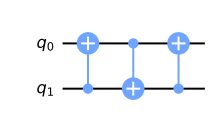

In [132]:
qc = QuantumCircuit(2)
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw()

We can think of this as a process that swaps a $|1⟩$ from a to b, but with a useless `qc.cx(b,a)` at the beginning. We can also think of it as a process that swaps a $|1⟩$ from b to a, but with a useless `qc.cx(b,a)` at the end. Either way, the result is a process that can do the swap both ways around.

The same effect would also result if we changed the order of the CNOT gates:

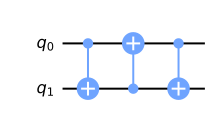

In [133]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.cx(a,b)
qc.cx(b,a)
qc.cx(a,b)
qc.draw()

#### Quick Exercise: 
1. Find different circuit that swaps qubits in the states $|+⟩$ and $|−⟩$, and show this is equivalent to the circuit shown above.


##  Controlled Rotations

### Controlled-$R_y(\theta)$

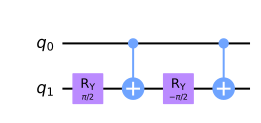

In [134]:
qc = QuantumCircuit(2)
theta = pi # theta can be anything (pi chosen arbitrarily)
qc.ry(theta/2,t)
qc.cx(c,t)
qc.ry(-theta/2,t)
qc.cx(c,t)
qc.draw()

If the control qubit is in state $|0⟩$, all we have here is a $R_y(θ/2)$ immediately followed by its inverse, $R_y(−θ/2)$ . The end effect is trivial. If the control qubit is in state $|1⟩$ , however, the ry(-theta/2) is effectively preceded and followed by an X gate. This has the effect of flipping the direction of the y rotation and making a second $R_y(θ/2)$ . The net effect in this case is therefore to make a controlled version of the rotation $R_y(θ)$.

### General controlled version of single qubit rotation, $V$

We can also make a controlled version of any single-qubit rotation, $V$. For this we simply need to find three rotations A, B and C, and a phase $α$ such that:

$$ ABC=I\;\;\; e^{iα}AZBZC=V $$

In [135]:
A = Gate('A', 1, [])
B = Gate('B', 1, [])
C = Gate('C', 1, [])
alpha = 1 # arbitrarily define alpha to allow drawing of circuit

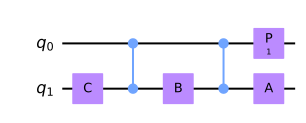

In [136]:
qc = QuantumCircuit(2)
qc.append(C, [t])
qc.cz(c,t)
qc.append(B, [t])
qc.cz(c,t)
qc.append(A, [t])
qc.p(alpha,c)
qc.draw()

Here A, B and C are gates that implement $A$, $B$ and $C$, respectively.



## The Toffoli

The Toffoli gate is a three-qubit gate with two controls and one target. It performs an X on the target only if both controls are in the state $|1⟩$. The final state of the target is then equal to either the AND or the NAND of the two controls, depending on whether the initial state of the target was  $|
0
⟩$ or $|
1
⟩$. It can also be though of as a controlled-controlled-NOT, and is also called the CCX gate.

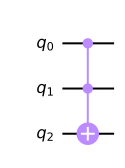

In [137]:
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Toffoli with control qubits a and b and target t
qc.ccx(a,b,t)
qc.draw()

### General Controlled-Controlled-U

To see how to build it from single- and two-qubit gates, it is helpful to first show how to build something even more general: an arbitrary controlled-controlled-U for any single-qubit rotation U

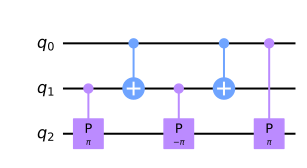

In [138]:
qc = QuantumCircuit(3)
qc.cp(theta,b,t)
qc.cx(a,b)
qc.cp(-theta,b,t)
qc.cx(a,b)
qc.cp(theta,a,t)
qc.draw()

### Toffoli from other gates

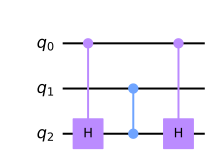

In [139]:
qc = QuantumCircuit(3)
qc.ch(a,t)
qc.cz(b,t)
qc.ch(a,t)
qc.draw()

For the state $|00⟩$ on the two controls, this does nothing to the target. For $|11⟩$, the target experiences a $Z$ gate that is both preceded and followed by an $H$. The net effect is an $X$ on the target. For the states $|01⟩$ and $|10⟩$, the target experiences either just the two Hadamards (which cancel each other out) or just the $Z$ (which only induces a relative phase). This therefore also reproduces the effect of an AND, because the value of the target is only changed for the $|11⟩$ state on the controls -- but it does it with the equivalent of just three CNOT gates.


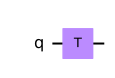

In [140]:
qc = QuantumCircuit(1)
qc.t(0) # T gate on qubit 0
qc.draw()

It is a rotation around the z axis by $θ=π/4$, and so is expressed mathematically as $R_z(π/4)=e^{iπ/8Z}$.


Using the Hadamard and the methods discussed in the last chapter, we can use the T gate to create a similar rotation around the x axis:

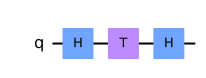

In [141]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.draw()

Now let's put the two together. Let's make the gate $R_z(π/4)R_x(π/4)$.

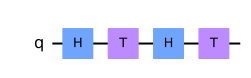

In [142]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.draw()

# Deutsch-Jozsa Algorithm

similar examples using the widget below. Press the buttons to add H-gates and oracles, re-run the cell and/or set case="constant" to try out different oracles.

In [143]:
from qiskit_textbook.widgets import dj_widget
dj_widget(size="small", case="balanced")

HTMLMath(value='$$ |00\\rangle = |00\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xce\x00\x00\x00\xcc\x08\x06\x00\x00\x00;\xd7\x9c…

In [144]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

### Constant Oracle

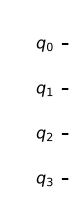

In [145]:
# set the length of the n-bit input string. 
n = 3

const_oracle = QuantumCircuit(n+1)

output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)

const_oracle.draw()

### Balance Oracle

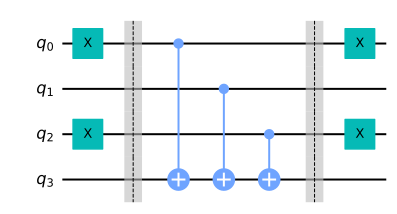

In [146]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Show oracle
balanced_oracle.draw()

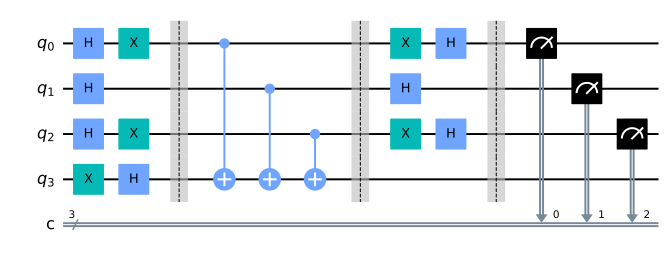

In [147]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit += balanced_oracle

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw()

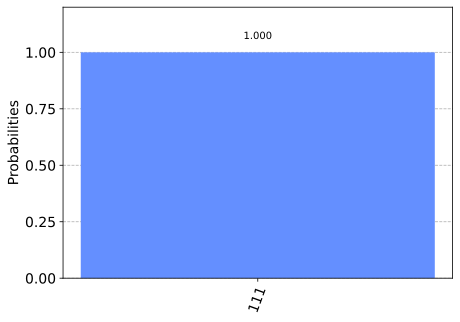

In [148]:
# use local simulator
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(dj_circuit, qasm_sim)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

### Generalised Circuits  

In [149]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

Let's also create a function that takes this oracle gate and performs the Deutsch-Joza algorithm on it:

In [150]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

Finally, let's use these functions to play around with the algorithm:

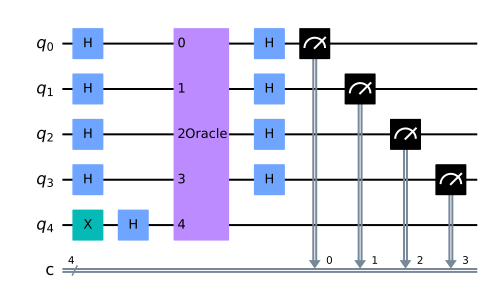

In [151]:
n = 4
oracle_gate = dj_oracle('constant', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw()

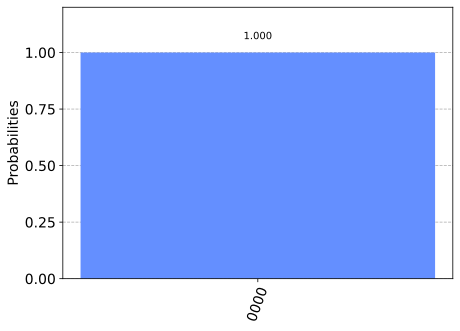

In [152]:
transpiled_dj_circuit = transpile(dj_circuit, qasm_sim)
qobj = assemble(transpiled_dj_circuit)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

In [153]:
from qiskit_textbook.problems import dj_problem_oracle
oracle = dj_problem_oracle(4)

In [154]:
dj_circuit = dj_algorithm(oracle, 4)

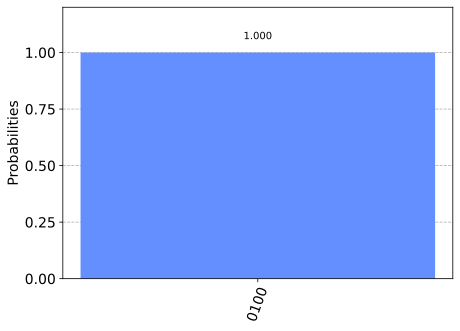

In [155]:
transpiled_dj_circuit = transpile(dj_circuit, qasm_sim)
qobj = assemble(transpiled_dj_circuit)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)